In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\flight.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

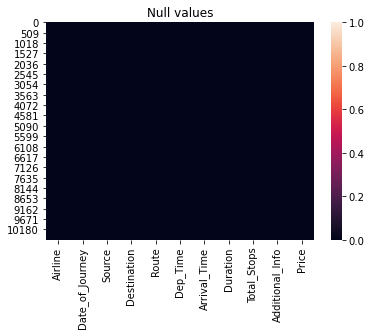

In [8]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

# Making dataframe for categorical data

In [9]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
data_visualization_categorical=data[['Airline','Source','Destination','Additional_Info']].copy()

In [11]:
data_visualization_categorical.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info'], dtype='object')

In [12]:
len(data_visualization_categorical.columns)

4

In [13]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [15]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [16]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.


In [17]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [18]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [19]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]
                                      


split the Route column to create multiple columns with cities that the flight travels through

In [20]:
data.Route=data.Route.str.split('→')

In [21]:
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [22]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

we split the Dep_time column

In [23]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [24]:
data.Dep_Time

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [25]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Min']=data.Dep_Time.str[1]

In [26]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [27]:
data.Arrival_Time

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10683, dtype: object

In [28]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_arrival']=data.Arrival_Time.str[0]
data['Time_of_arrival']=data.Time_of_arrival.str.split(':')
data['Arrival_Time_Hour']=data.Time_of_arrival.str[0]
data['Arrival_Time_Min']=data.Time_of_arrival.str[1]

In [29]:
data['Arrival_Time_Hour']=data.Time_of_arrival.str[0]
data['Arrival_Time_Min']=data.Time_of_arrival.str[1]

Next, we divide the ‘Duration’ column to ‘Travel_hours’ and ‘ Travel_mins’


In [30]:
data.Duration=data.Duration.str.split(' ')
data['Travel_hours']=data.Duration.str[0]
data['Travel_hours']=data['Travel_hours'].str.split('h')
data['Travel_hours']=data['Travel_hours'].str[0]
data.Travel_hours=data.Travel_hours

In [31]:
data['Travel_mins']=data.Duration.str[1]

In [32]:
data.Travel_mins=data.Travel_mins.str.split('m')
data.Travel_mins=data.Travel_mins.str[0]


We also treat the ‘Total_stops’ column

In [33]:
data.Total_Stops.replace('non-stop','0',inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

We proceed further to the ‘Additional_info’ column, We replace ‘No Info’ by ‘No info’ to merge it into a single category 

In [34]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [35]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_of_arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_mins           1032
dtype: int64

In [36]:
data.drop(['Route','City5','City6'],axis=1,inplace=True)

In [37]:
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
City4                9117
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Time_of_arrival         0
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins          1032
dtype: int64

In [38]:
data.drop(['City4'],axis=1,inplace=True)

In [39]:
#now will fill the missing values
data['City3'].fillna('None',inplace=True)
data['Arrival_date'].fillna(data['Date'],inplace=True)
data['Travel_mins'].fillna(0,inplace=True)

In [40]:
data['City1'].fillna('DEL',inplace=True)
data['City2'].fillna('COK',inplace=True)
data['Total_Stops'].fillna(0,inplace=True)

In [41]:
data.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_date         0
Time_of_arrival      0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_hours         0
Travel_mins          0
dtype: int64

In [42]:
#changing numerical columns from object to int
data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Min=data.Dep_Time_Min.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Min=data.Arrival_Time_Min.astype('int64')
data.Travel_mins=data.Travel_mins.astype('int64')
data.drop(index=6474,inplace=True,axis=0)




In [43]:
data.Travel_hours=data.Travel_hours.astype('int64')

In [44]:
#list of columns
categorical=['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_mins'],

<AxesSubplot:>

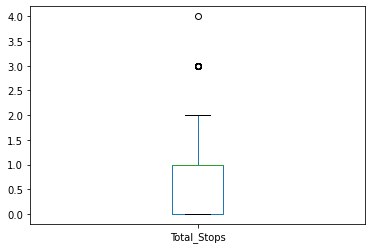

In [45]:
#checking outliers
data['Total_Stops'].plot.box()

<AxesSubplot:>

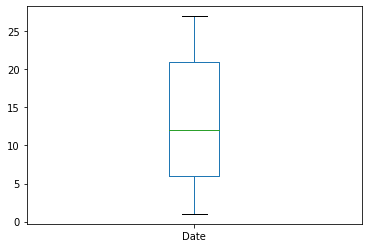

In [46]:
data['Date'].plot.box()

<AxesSubplot:>

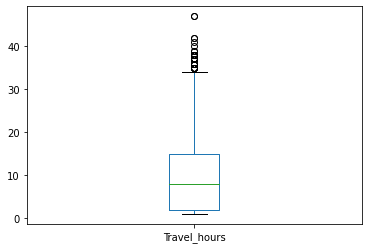

In [47]:
data['Travel_hours'].plot.box()

In [48]:
data.skew()

Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Year                 0.000000
Dep_Time_Hour        0.113224
Dep_Time_Min         0.167210
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Arrival_Time_Min     0.110928
Travel_hours         0.850822
Travel_mins         -0.091004
dtype: float64

In [49]:
data.Travel_hours=np.log(data.Travel_hours)
data.Travel_hours.skew()

-0.26612233332369917

so we have sucessfully skewed data

# data encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()
label=le.fit_transform(data["Airline"])
label
data=data.drop("Airline",axis='columns')
data["Airline"]=label


In [52]:
le=LabelEncoder()
label=le.fit_transform(data["Source"])
label
data=data.drop("Source",axis='columns')
data["Source"]=label

In [53]:
le=LabelEncoder()
label=le.fit_transform(data["Destination"])
label
data=data.drop("Destination",axis='columns')
data["Destination"]=label

In [54]:
le=LabelEncoder()
label=le.fit_transform(data["Additional_Info"])
label
data=data.drop("Additional_Info",axis='columns')
data["Additional_Info"]=label

In [55]:
le=LabelEncoder()
label=le.fit_transform(data["City1"])
label
data=data.drop("City1",axis='columns')
data["City1"]=label

In [56]:
le=LabelEncoder()
label=le.fit_transform(data["City2"])
label
data=data.drop("City2",axis='columns')
data["City2"]=label

In [57]:
le=LabelEncoder()
label=le.fit_transform(data["City3"])
label
data=data.drop("City3",axis='columns')
data["City3"]=label
data

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year,Dep_Time_Hour,...,Arrival_Time_Min,Travel_hours,Travel_mins,Airline,Source,Destination,Additional_Info,City1,City2,City3
0,"[24, 03, 2019]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",0,3897,24,3,2019,22,...,10,0.693147,50,3,0,5,7,0,13,29
1,"[1, 05, 2019]","[05, 50]",[13:15],"[7h, 25m]",2,7662,1,5,2019,5,...,15,1.945910,25,1,3,0,7,2,25,1
2,"[9, 06, 2019]","[09, 25]","[04:25, 10, Jun]",[19h],2,13882,9,6,2019,9,...,25,2.944439,0,4,2,1,7,4,32,4
3,"[12, 05, 2019]","[18, 05]",[23:30],"[5h, 25m]",1,6218,12,5,2019,18,...,30,1.609438,25,3,3,0,7,2,34,3
4,"[01, 03, 2019]","[16, 50]",[21:35],"[4h, 45m]",1,13302,1,3,2019,16,...,35,1.386294,45,3,0,5,7,0,34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,"[9, 04, 2019]","[19, 55]",[22:25],"[2h, 30m]",0,4107,9,4,2019,19,...,25,0.693147,30,0,3,0,7,2,5,29
10679,"[27, 04, 2019]","[20, 45]",[23:20],"[2h, 35m]",0,4145,27,4,2019,20,...,20,0.693147,35,1,3,0,7,2,5,29
10680,"[27, 04, 2019]","[08, 20]",[11:20],[3h],0,7229,27,4,2019,8,...,20,1.098612,0,4,0,2,7,0,13,29
10681,"[01, 03, 2019]","[11, 30]",[14:10],"[2h, 40m]",0,12648,1,3,2019,11,...,10,0.693147,40,10,0,5,7,0,13,29


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_of_Journey    10682 non-null  object 
 1   Dep_Time           10682 non-null  object 
 2   Arrival_Time       10682 non-null  object 
 3   Duration           10682 non-null  object 
 4   Total_Stops        10682 non-null  int64  
 5   Price              10682 non-null  int64  
 6   Date               10682 non-null  int64  
 7   Month              10682 non-null  int64  
 8   Year               10682 non-null  int64  
 9   Dep_Time_Hour      10682 non-null  int64  
 10  Dep_Time_Min       10682 non-null  int64  
 11  Arrival_date       10682 non-null  int64  
 12  Time_of_arrival    10682 non-null  object 
 13  Arrival_Time_Hour  10682 non-null  int64  
 14  Arrival_Time_Min   10682 non-null  int64  
 15  Travel_hours       10682 non-null  float64
 16  Travel_mins        106

In [59]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Time_of_arrival'],axis=1,inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Stops        10682 non-null  int64  
 1   Price              10682 non-null  int64  
 2   Date               10682 non-null  int64  
 3   Month              10682 non-null  int64  
 4   Year               10682 non-null  int64  
 5   Dep_Time_Hour      10682 non-null  int64  
 6   Dep_Time_Min       10682 non-null  int64  
 7   Arrival_date       10682 non-null  int64  
 8   Arrival_Time_Hour  10682 non-null  int64  
 9   Arrival_Time_Min   10682 non-null  int64  
 10  Travel_hours       10682 non-null  float64
 11  Travel_mins        10682 non-null  int64  
 12  Airline            10682 non-null  int32  
 13  Source             10682 non-null  int32  
 14  Destination        10682 non-null  int32  
 15  Additional_Info    10682 non-null  int32  
 16  City1              106

# heatmap

<AxesSubplot:>

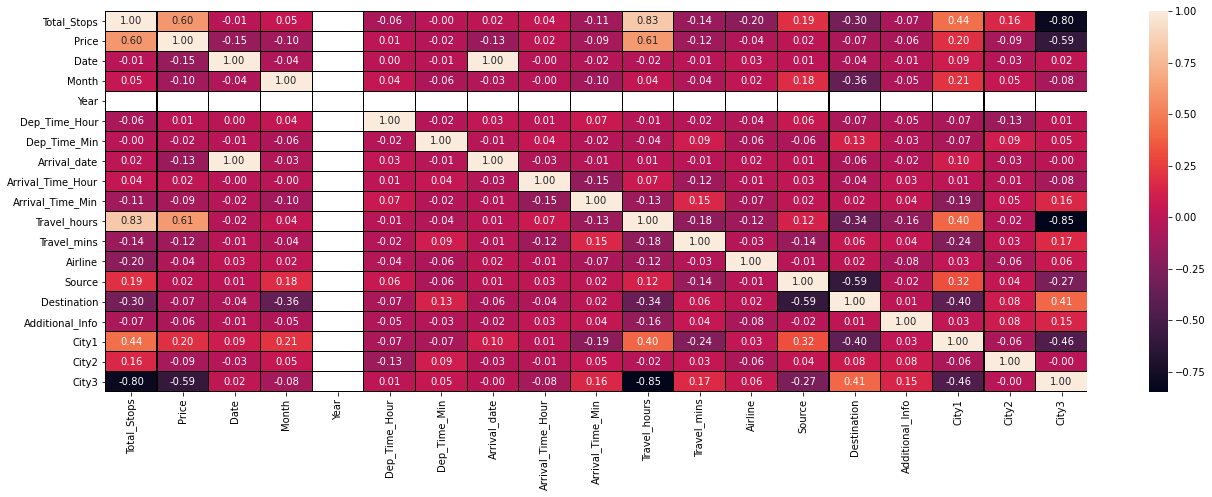

In [61]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [62]:
data.drop(['Year'],axis=1,inplace=True)

In [63]:
data.corr()

,Total_Stops,Price,Date,Month,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins,Airline,Source,Destination,Additional_Info,City1,City2,City3
Total_Stops,1.000000,0.603776,-0.009206,0.054603,-0.061511,-0.002966,0.018008,0.038151,-0.107266,0.833236,-0.136580,-0.199061,0.192593,-0.295651,-0.067943,0.437797,0.161587,-0.800594
Price,0.603776,1.000000,-0.153619,-0.103431,0.006718,-0.024726,-0.134527,0.024203,-0.086489,0.614039,-0.124673,-0.039318,0.015711,-0.071304,-0.063862,0.195913,-0.087404,-0.591567
Date,-0.009206,-0.153619,1.000000,-0.038505,0.002271,-0.008149,0.997449,-0.003160,-0.017362,-0.023833,-0.009112,0.026137,0.005043,-0.040914,-0.012798,0.089654,-0.025021,0.022748
Month,0.054603,-0.103431,-0.038505,1.000000,0.039201,-0.059062,-0.034689,-0.003889,-0.100399,0.036121,-0.041076,0.024474,0.183551,-0.364596,-0.045391,0.212636,0.048542,-0.083010
Dep_Time_Hour,-0.061511,0.006718,0.002271,0.039201,1.000000,-0.024887,0.029013,0.005193,0.067816,-0.013863,-0.023669,-0.035125,0.058954,-0.073045,-0.048133,-0.070273,-0.126378,0.014851
Dep_Time_Min,-0.002966,-0.024726,-0.008149,-0.059062,-0.024887,1.000000,-0.011256,0.043008,-0.017833,-0.035646,0.092741,-0.059893,-0.057226,0.127775,-0.026095,-0.072621,0.091869,0.049052
Arrival_date,0.018008,-0.134527,0.997449,-0.034689,0.029013,-0.011256,1.000000,-0.033803,-0.014590,0.010403,-0.009137,0.018772,0.014608,-0.055461,-0.020233,0.101335,-0.025472,-0.000736
Arrival_Time_Hour,0.038151,0.024203,-0.003160,-0.003889,0.005193,0.043008,-0.033803,1.000000,-0.154453,0.072625,-0.118306,-0.007446,0.025573,-0.039751,0.031119,0.008003,-0.012478,-0.081905
Arrival_Time_Min,-0.107266,-0.086489,-0.017362,-0.100399,0.067816,-0.017833,-0.014590,-0.154453,1.000000,-0.130773,0.151900,-0.070889,0.020747,0.017017,0.039267,-0.194262,0.045858,0.159849
Travel_hours,0.833236,0.614039,-0.023833,0.036121,-0.013863,-0.035646,0.010403,0.072625,-0.130773,1.000000,-0.177245,-0.123580,0.123579,-0.342835,-0.162619,0.402344,-0.022022,-0.845992


In [1]:
#checking the columns which are positively and negatively correlated with the target column
plt.figure(figsize=(22,7))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

NameError: name 'plt' is not defined

In [65]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [66]:
#devide data set into feature and label
y=data['Price']
x=data.drop(['Price'],axis=1)

In [67]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [71]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(0,100):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.2)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  0 is 0.7565201676441533
R2 score correspond to random state  0 is 0.5859495608097537
R2 score correspond to random state  0 is 0.017083517862649722
R2 score correspond to random state  0 is 0.48830824158733055
R2 score correspond to random state  0 is 0.7803888518105803
R2 score correspond to random state  1 is 0.8045801024850422
R2 score correspond to random state  1 is 0.626052838682385
R2 score correspond to random state  1 is 0.2623134774984702
R2 score correspond to random state  1 is 0.5245374549999047
R2 score correspond to random state  1 is 0.8213202976348216
R2 score correspond to random state  2 is 0.7961577591249105
R2 score correspond to random state  2 is 0.6082799144138796
R2 score correspond to random state  2 is 0.25129832053333234
R2 score correspond to random state  2 is 0.5065683477292249
R2 score correspond to random state  2 is 0.8497710527337722
R2 score correspond to random state  3 is 0.8055344940895109
R2 score correspond t

In [72]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-1.22047697,  1.23728754, -1.46770673, ..., -1.51560675,
         0.13720382,  1.39501469],
       [ 1.741835  , -1.47530729,  0.25015261, ..., -0.29328049,
         1.63489042, -1.08228   ],
       [ 1.741835  , -0.53179604,  1.10908228, ...,  0.92904577,
         2.50854095, -0.81685557],
       ...,
       [-1.22047697,  1.59110426, -0.60877706, ..., -1.51560675,
         0.13720382,  1.39501469],
       [-1.22047697, -1.47530729, -1.46770673, ..., -1.51560675,
         0.13720382,  1.39501469],
       [ 1.741835  , -0.53179604,  0.25015261, ...,  0.92904577,
         0.51162547, -0.81685557]])

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=94)

In [74]:
dt=DecisionTreeRegressor()

In [75]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [76]:
pred_test=dt.predict(x_test)
print(r2_score(y_test,pred_test))

0.8967433411438777


# cross validation

In [77]:
from sklearn.model_selection import cross_val_score


In [78]:
for i in range(2,10):
    cv=cross_val_score(dt,x,y,cv=i)
    print(dt,cv.mean())


DecisionTreeRegressor() 0.7961669536526234
DecisionTreeRegressor() 0.7957039380177101
DecisionTreeRegressor() 0.8200252618394204
DecisionTreeRegressor() 0.8221751006631483
DecisionTreeRegressor() 0.8171382016528614
DecisionTreeRegressor() 0.8159273976953505
DecisionTreeRegressor() 0.8360975275781157
DecisionTreeRegressor() 0.8347744775967549


In [79]:
#lets plot and visualize
y_pred=dt.predict(x_test)
y_pred

array([ 2227.,  8529., 12898., ..., 12284.,  7870., 13941.])

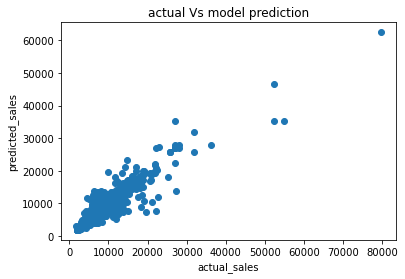

In [80]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.title('actual Vs model prediction')
plt.show()

# model saving

In [81]:
import joblib

In [82]:
joblib.dump(dt,'flight_price_prediction')

['flight_price_prediction']

# conclusion

In [83]:
Model=joblib.load('flight_price_prediction')
result=Model.predict(x_test)
r2_score(y_test,result)

0.8967433411438777

lets we have test data is given will test the model on it

In [84]:
testdata=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\Test_set.xlsx")
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [85]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [86]:
testdata.shape

(2671, 10)

In [87]:
testdata.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [88]:
testdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Making dataframe for categorical data

In [89]:
testdata_visualization_categorical=testdata[['Airline','Source','Destination','Additional_Info']].copy()

We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

In [90]:
testdata.Date_of_Journey=testdata.Date_of_Journey.str.split('/')

In [91]:
testdata['Date']=testdata.Date_of_Journey.str[0]
testdata['Month']=testdata.Date_of_Journey.str[1]
testdata['Year']=testdata.Date_of_Journey.str[2]

In [92]:
testdata.Route=testdata.Route.str.split('→')

In [93]:
testdata['City1']=testdata.Route.str[0]
testdata['City2']=testdata.Route.str[1]
testdata['City3']=testdata.Route.str[2]
testdata['City4']=testdata.Route.str[3]
testdata['City5']=testdata.Route.str[4]
testdata['City6']=testdata.Route.str[5]

In [94]:
testdata.Dep_Time=testdata.Dep_Time.str.split(':')

In [95]:
testdata['Dep_Time_Hour']=testdata.Dep_Time.str[0]
testdata['Dep_Time_Min']=testdata.Dep_Time.str[1]

In [96]:
testdata.Arrival_Time=testdata.Arrival_Time.str.split(' ')

In [97]:
testdata['Arrival_date']=testdata.Arrival_Time.str[1]
testdata['Time_of_arrival']=testdata.Arrival_Time.str[0]
testdata['Time_of_arrival']=testdata.Time_of_arrival.str.split(':')
testdata['Arrival_Time_Hour']=testdata.Time_of_arrival.str[0]
testdata['Arrival_Time_Min']=testdata.Time_of_arrival.str[1]

In [98]:
testdata['Arrival_Time_Hour']=testdata.Time_of_arrival.str[0]
testdata['Arrival_Time_Min']=testdata.Time_of_arrival.str[1]

In [99]:
testdata.Duration=testdata.Duration.str.split(' ')
testdata['Travel_hours']=testdata.Duration.str[0]
testdata['Travel_hours']=testdata['Travel_hours'].str.split('h')
testdata['Travel_hours']=testdata['Travel_hours'].str[0]
testdata.Travel_hours=testdata.Travel_hours

In [100]:
testdata['Travel_mins']=testdata.Duration.str[1]

In [101]:
testdata.Travel_mins=testdata.Travel_mins.str.split('m')
testdata.Travel_mins=testdata.Travel_mins.str[0]


In [102]:
testdata.Total_Stops.replace('non-stop','0',inplace=True)
testdata.Total_Stops=testdata.Total_Stops.str.split(' ')
testdata.Total_Stops=testdata.Total_Stops.str[0]

In [103]:
testdata.Additional_Info.replace('No Info','No info',inplace=True)

In [104]:
testdata.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                 849
City4                2280
City5                2659
City6                2670
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         1605
Time_of_arrival         0
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins           254
dtype: int64

In [105]:
testdata.drop(['City4','City5','City6'],axis=1,inplace=True)

In [106]:
testdata['Arrival_date'].fillna(testdata['Date'],inplace=True)
testdata['Travel_mins'].fillna('m',inplace=True)
testdata['City3'].fillna('COK',inplace=True)

In [107]:
#changing numerical columns from object to int
testdata.Total_Stops=testdata.Total_Stops.astype('int64')
testdata.Date=testdata.Date.astype('int64')
testdata.Month=testdata.Month.astype('int64')
testdata.Year=testdata.Year.astype('int64')
testdata.Dep_Time_Hour=testdata.Dep_Time_Hour.astype('int64')
testdata.Dep_Time_Min=testdata.Dep_Time_Min.astype('int64')
#testdata.Arrival_date=testdata.Arrival_date.astype('int64')
testdata.Arrival_Time_Hour=testdata.Arrival_Time_Hour.astype('int64')
testdata.Arrival_Time_Min=testdata.Arrival_Time_Min.astype('int64')
#testdata.Travel_mins=testdata.Travel_mins.astype('int64')

In [108]:
testdata[testdata['Travel_hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
2660,Air India,"[12, 03, 2019]",Mumbai,Hyderabad,"[BOM , GOI , PNQ , HYD]","[16, 50]",[16:55],[5m],2,No info,...,GOI,PNQ,16,50,12,"[16, 55]",16,55,5m,m


In [109]:
testdata.drop(index=2660,inplace=True,axis=0)
testdata.Travel_hours=testdata.Travel_hours.astype('int64')

In [110]:
#list of columns
categorical=['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_mins'],

In [111]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2670 non-null   object
 1   Date_of_Journey    2670 non-null   object
 2   Source             2670 non-null   object
 3   Destination        2670 non-null   object
 4   Route              2670 non-null   object
 5   Dep_Time           2670 non-null   object
 6   Arrival_Time       2670 non-null   object
 7   Duration           2670 non-null   object
 8   Total_Stops        2670 non-null   int64 
 9   Additional_Info    2670 non-null   object
 10  Date               2670 non-null   int64 
 11  Month              2670 non-null   int64 
 12  Year               2670 non-null   int64 
 13  City1              2670 non-null   object
 14  City2              2670 non-null   object
 15  City3              2670 non-null   object
 16  Dep_Time_Hour      2670 non-null   int64 


In [112]:
testdata.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Time_of_arrival'],axis=1,inplace=True)

In [113]:
testdata.shape

(2670, 19)

In [114]:
testdata.drop(['Year'],axis=1,inplace=True)

In [115]:
testdata.shape

(2670, 18)

In [116]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2670 non-null   object
 1   Source             2670 non-null   object
 2   Destination        2670 non-null   object
 3   Route              2670 non-null   object
 4   Total_Stops        2670 non-null   int64 
 5   Additional_Info    2670 non-null   object
 6   Date               2670 non-null   int64 
 7   Month              2670 non-null   int64 
 8   City1              2670 non-null   object
 9   City2              2670 non-null   object
 10  City3              2670 non-null   object
 11  Dep_Time_Hour      2670 non-null   int64 
 12  Dep_Time_Min       2670 non-null   int64 
 13  Arrival_date       2670 non-null   object
 14  Arrival_Time_Hour  2670 non-null   int64 
 15  Arrival_Time_Min   2670 non-null   int64 
 16  Travel_hours       2670 non-null   int64 


In [117]:
testdata.drop(['Route'],axis=1,inplace=True)

In [118]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2670 non-null   object
 1   Source             2670 non-null   object
 2   Destination        2670 non-null   object
 3   Total_Stops        2670 non-null   int64 
 4   Additional_Info    2670 non-null   object
 5   Date               2670 non-null   int64 
 6   Month              2670 non-null   int64 
 7   City1              2670 non-null   object
 8   City2              2670 non-null   object
 9   City3              2670 non-null   object
 10  Dep_Time_Hour      2670 non-null   int64 
 11  Dep_Time_Min       2670 non-null   int64 
 12  Arrival_date       2670 non-null   object
 13  Arrival_Time_Hour  2670 non-null   int64 
 14  Arrival_Time_Min   2670 non-null   int64 
 15  Travel_hours       2670 non-null   int64 
 16  Travel_mins        2670 non-null   object


# data encoding

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le=LabelEncoder()
label=le.fit_transform(testdata["Airline"])
label
testdata=testdata.drop("Airline",axis='columns')
testdata["Airline"]=label


In [121]:
le=LabelEncoder()
label=le.fit_transform(testdata["City1"])
label
testdata=testdata.drop("City1",axis='columns')
testdata["City1"]=label

In [122]:
le=LabelEncoder()
label=le.fit_transform(testdata["City2"])
label
testdata=testdata.drop("City2",axis='columns')
testdata["City2"]=label

In [123]:
testdata.City2

0        7
1       29
2        7
3        7
4       13
        ..
2666    14
2667     5
2668     7
2669     7
2670     7
Name: City2, Length: 2670, dtype: int32

In [124]:
le=LabelEncoder()
label=le.fit_transform(testdata["City3"])
label
testdata=testdata.drop("City3",axis='columns')
testdata["City3"]=label

In [125]:
le=LabelEncoder()
label=le.fit_transform(testdata["Source"])
label
testdata=testdata.drop("Source",axis='columns')
testdata["Source"]=label

In [126]:
le=LabelEncoder()
label=le.fit_transform(testdata["Destination"])
label
testdata=testdata.drop("Destination",axis='columns')
testdata["Destination"]=label

In [127]:
le=LabelEncoder()
label=le.fit_transform(testdata["Arrival_date"])
label
testdata=testdata.drop("Arrival_date",axis='columns')
testdata["Arrival_date"]=label

In [128]:
le=LabelEncoder()
label=le.fit_transform(testdata["Travel_mins"])
label
testdata=testdata.drop("Travel_mins",axis='columns')
testdata["Travel_mins"]=label

In [129]:
le=LabelEncoder()
label=le.fit_transform(testdata["Additional_Info"])
label
testdata=testdata.drop("Additional_Info",axis='columns')
testdata["Additional_Info"]=label
testdata

,Total_Stops,Date,Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Airline,City1,City2,City3,Source,Destination,Arrival_date,Travel_mins,Additional_Info
0,1,6,6,17,30,4,25,10,4,3,7,5,2,1,6,10,5
1,1,12,5,6,20,10,20,4,3,2,29,3,3,0,12,11,5
2,1,21,5,19,15,19,0,23,4,3,7,5,2,1,20,7,3
3,1,21,5,8,0,21,0,13,6,3,7,5,2,1,19,11,5
4,0,24,6,23,55,2,45,2,0,0,13,26,0,2,23,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,1,2,14,3,3,0,6,10,5
2667,0,27,3,14,20,16,55,2,3,2,5,26,3,0,24,5,5
2668,1,6,3,21,50,4,25,6,4,3,7,5,2,1,6,5,5
2669,1,6,3,4,0,19,15,15,1,3,7,5,2,1,28,1,5


In [130]:
#load the saved model
flight_price=joblib.load('flight_price_prediction')
prices=flight_price.predict(testdata)
prices

array([5583., 5583., 5583., ..., 5583., 8452., 7804.])